# Predictive Modeling for Stroke Prediction

## Group Name & Members
- Group Name: 62
- Group Members: Nitin Tundwal (S3572060), Mark Pereira (s3797413), Shonil Dabreo (s3835204)

## Table of Contents
- [Introduction](#introduction)
    - [Report Overview](#report)
    - [Overview of Methodology](#methodology)
- [Data Preparation for Predictive Modeling](#prepare)
    - [Splitting Data and Target](#split)
    - [One-Hot Encoding](#encode)
    - [Scaling and Normalising Features](#features)
- [Predictive Modeling](#predict)
    - [Feature Selection](#select)
        - [Performance with All Features](#fullselect)
        - [Random Forest Importance Feature Selection](#RFIselect)
        - [F Score Feature Selection](#fscoreselect)
        - [Performance Comparison of Feature Selection Methods](#performselect)
    - [Model Fitting & Tuning](#tuning)
        - [Train-Test Split](#ttsplit)
        - [Select the Ten Best Features](#ten)  
        - [Prediction & Performance Metric Scores of Different Models](#modscores) 
        - [KNN Hyperparameter Tuning](#KNN)
        - [Decision Tree Hyperparamter Tunning](#DT)
        - [Gaussian Naive Bayes Hyperparameter Tuning](#GB)
        - [Support Vector Machines Hyperparameter Tuning](#SVM)
        - [Random Forest Hyperparameter Tuning](#RF)
        - [Best Score Summary](#BSsummary)
    - [Model Comparison](#compare)
        - [Area Under the Curve](#area)
        - [Paired T-Test Comparison](#pairedttest)
        - [Classification Report: Accuracy, Precision, Recall, & F1 Score](#classification)
        - [Confusion Matrix](#confusion)
- [Critique & Limitations](#critique)
- [Summary & Conclusions](#conclusion)
    - [Project Summary](#psummary)
    - [Summary of Findings](#fsummary)
    - [Conclusions](#conclusions)
- [References](#references)

# Introduction<a name="introduction"></a>

## Report Overview <a name="report"></a>
Previously in the report we completed the phase 1 of Machine Learning Assignment where we had done Data cleaning and Preprocessing (dealing with missing values, dropping ID-like columns, data aggregation, etc.) and also the Data exploration and Visualisation (charts, graphs, interactions, etc) as appropriate.

Followed by phase 1, the task was to implement different Machine Learning models for predicting the Heart stroke. The one-hot encoding as well as feature scaling and normalization were performed on relevant features as a part of data preparation. Then various feature selection methods like Random forest and F-score were conducted on descriptive features to identify the best features. Followed by which Hyper-Parameter-Tuning with different Machine Learning models (K-Nearest Neighbour, Random Forest, Gaussian Naive Bayes,Decision tree, Support Vector Machines) was carried out based on the best descriptive features that were 
earlier identified in the feature selection method.

Moreover, the predictive power of different models were compared using Confusion Matrix, Area Under Curve (AUC), Profit/Loss matrix and a Classification Report (accuracy, recall, precision, F1 scores).

Lastly, the results were discussed by analysing the limitations in Machine Learning models and our approach.

## Overview of Methodology<a name="methodology"></a>

Feature selection was used to determine the best features. A 5-part cross validation iterated 3 times with a scoring matrix AUC curve was carried out to inspect the performance of 10 selected descriptive features. Random forest and F-score techniques were used to generate predictions of different features based on which the best optimal features were found. We found that 10 features produce better results compared to other numbers of features in F-score and Random Forest.

Now for the Model fitting and tuning section, train-test split was used as 70% training and 30% testing data. The D_train_fs and D_test_fs (training and testing set) included the 10 best features selected based on F-score in comparison to the Random Forest. For fine tuning of all the models Grid Search method and AUC curve as a scoring metric was used. The dataset was highly imbalanced so AUC curve was used as it works best on biased dataset and in ranking predictions. Different models were iterated with set of parameters and then best parameters were choosen from models that produced optimal results. 




# Data Preparation for Predictive Modeling <a name="prepare"></a>

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import warnings

###
warnings.filterwarnings('ignore')
###
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

In [2]:
# Importing dataset
stroke_data = pd.read_csv("Data_Group62.csv")
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
## Data Preparation from Phase 1

# Dropping the id column
stroke_data = stroke_data.drop(columns=['id'])
# Dropping the rows with age less than 1
stroke_data = stroke_data[stroke_data['age'] > 1] 
stroke_data['age'].describe()
# Replacing missing values with mean
stroke_data.bmi.replace(to_replace=np.nan, value=stroke_data.bmi.mean(), inplace=True)
# Categorical Variables
categoricalColumns = stroke_data.columns[stroke_data.dtypes==object].tolist()
# Other category in gender removed as only 1 instance
stroke_data = stroke_data[stroke_data['gender'] != 'Other']
stroke_data['gender'].value_counts()
# Replacing minus with underscore to avoid StatsModels modules confusion
for col in categoricalColumns:
    stroke_data[col] = stroke_data[col].str.replace('-', '_')
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self_employed,Rural,202.21,28.995043,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self_employed,Rural,174.12,24.000000,never smoked,1


In [4]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self_employed,Rural,202.21,28.995043,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self_employed,Rural,174.12,24.000000,never smoked,1


## Splitting Data and Target <a name="split"></a>

In [5]:
Data = stroke_data.drop(columns='stroke')
target = stroke_data['stroke']
target.value_counts()

0    4812
1     249
Name: stroke, dtype: int64

## One Hot Encoding <a name="encode"></a>

OneHotEncoder() was used to encode the categorical columns with more than 2 levels: 'work_type' and 'smoking_status. Then, LabelEncoder() was used to encode binary columns: 'gender', 'ever_married' and 'residence_type'.

In [6]:
# Categorical Variables
categoricalColumns = Data.columns[Data.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col)
    print(Data[col].unique())
    print('')

Unique values for gender
['Male' 'Female']

Unique values for ever_married
['Yes' 'No']

Unique values for work_type
['Private' 'Self_employed' 'Govt_job' 'children' 'Never_worked']

Unique values for Residence_type
['Urban' 'Rural']

Unique values for smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']



In [7]:
for col in categoricalColumns:
    n = len(Data[col].unique())
    if (n == 2):
        Data[col] = pd.get_dummies(Data[col], drop_first=True)
   
# use one-hot-encoding for categorical features with >2 levels
Data = pd.get_dummies(Data)

In [8]:
Data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self_employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [9]:
Data.sample(5, random_state=999)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2337,0,21.00,0,0,0,0,59.52,33.7,0,0,1,0,0,0,0,1,0
4617,1,57.00,0,0,1,1,75.53,33.1,1,0,0,0,0,0,1,0,0
2952,1,34.00,0,0,0,1,72.75,22.2,1,0,0,0,0,1,0,0,0
1609,0,1.24,0,0,0,0,122.04,10.3,0,0,0,0,1,1,0,0,0
1505,1,46.00,0,0,1,0,59.05,28.3,0,0,1,0,0,0,1,0,0


## Scaling and Normalising Features <a name="features"></a>

Scaling and Normalization was done by using the MinMaxScaler function. The scaling is done to avoid the algorithms making assumptions where the data is varied with range of values. The copy of the dataframe is created to keep the data of the names of columns.

In [10]:
# Scaling
from sklearn import preprocessing

Data_df = Data.copy()

Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(Data)
Data = Data_scaler.fit_transform(Data)

In [11]:
pd.DataFrame(Data, columns=Data_df.columns).sample(5, random_state=999)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2316,0.0,0.246169,0.0,0.0,0.0,0.0,0.020312,0.268041,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4572,1.0,0.691053,0.0,0.0,1.0,1.0,0.094220,0.261168,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2923,1.0,0.406822,0.0,0.0,0.0,1.0,0.081387,0.136312,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1597,0.0,0.001977,0.0,0.0,0.0,0.0,0.308928,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1494,1.0,0.555116,0.0,0.0,1.0,0.0,0.018142,0.206186,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# Predictive Modelling <a name="predict"></a>

## Feature Selection <a name="select"></a>

Various feature selection techniques were used to analyze the optimal features. The code snippets below provided set of prediction results for different number of features. On the basis of prediction results, the 10 features were considered as the best features. 

### Performance with All Features <a name="fullselect"></a>

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn import metrics

clf = DecisionTreeClassifier(random_state=999)
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=3,
                                     random_state=999)
scoring_metric = 'roc_auc'
cv_results_full = cross_val_score(estimator=clf,
                             X=Data,
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_full

array([0.60300104, 0.54453222, 0.53673597, 0.56349272, 0.58075317,
       0.56196262, 0.54985447, 0.53505198, 0.55089397, 0.61344226,
       0.52403946, 0.58141372, 0.53661123, 0.55089397, 0.57556107])

In [13]:
cv_results_full.mean().round(3)

0.561

### Random Forest Importance Feature Selection <a name="RFIselect"></a>

In [14]:
# Feature Selection and Ranking
from sklearn.ensemble import RandomForestClassifier

num_features = 10
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = Data_df.columns[fs_indices_rfi].values
best_features_rfi

array(['avg_glucose_level', 'age', 'bmi', 'Residence_type', 'gender',
       'hypertension', 'heart_disease', 'smoking_status_never smoked',
       'work_type_Private', 'ever_married'], dtype=object)

In [15]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.27490563, 0.23652284, 0.22777885, 0.03569812, 0.03156218,
       0.02654328, 0.02230684, 0.02113187, 0.01967606, 0.01869814])

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
    

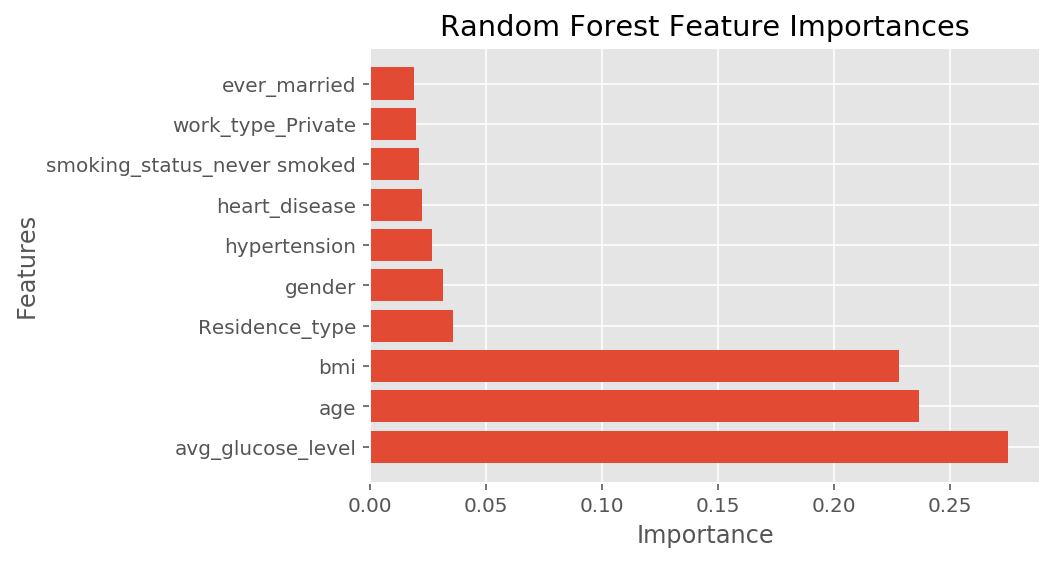

In [17]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')

In [18]:
cv_results_rfi = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_rfi],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_rfi.mean().round(3)

0.559

### F Score Feature Selection <a name="fscoreselect"></a>

In [19]:
# Using F-score
from sklearn import feature_selection
fs_fit_fscore = feature_selection.SelectKBest(feature_selection.f_classif, k=num_features)
fs_fit_fscore.fit_transform(Data, target)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]
fs_indices_fscore

array([ 1,  3,  6,  2,  4, 12, 14, 11, 13,  7], dtype=int64)

In [20]:
best_features_fscore = Data_df.columns[fs_indices_fscore].values
best_features_fscore

array(['age', 'heart_disease', 'avg_glucose_level', 'hypertension',
       'ever_married', 'work_type_children',
       'smoking_status_formerly smoked', 'work_type_Self_employed',
       'smoking_status_Unknown', 'bmi'], dtype=object)

In [21]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([324.2540689 ,  93.1494993 ,  89.59605355,  83.30886782,
        57.84664076,  33.38760762,  20.66333784,  19.07108908,
        14.39166861,   6.84755514])

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

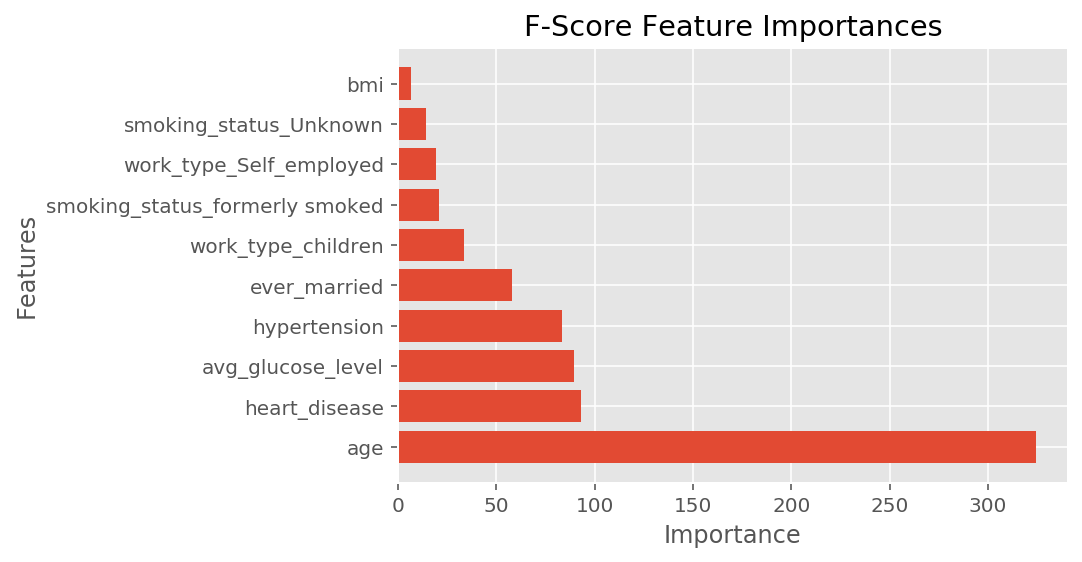

In [23]:
plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score')

In [24]:
Data[:, fs_indices_fscore].shape

(5061, 10)

In [25]:
cv_results_fscore = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_fscore],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_fscore.mean().round(3)

0.572

### Performance Comparison of Feature Selection Methods <a name="performselect"></a>

In contrast to the other feature selection methods, overall, F-Score presented the best results. The Full Set and Random Forest selection method had almost similar results indicating both the models performed fairly well. Moreover, there were no significant differences between all the prediction results.

In [26]:
print('Full Set of Features:', cv_results_full.mean().round(3))
print('F-Score:', cv_results_fscore.mean().round(3))
print('RFI:', cv_results_rfi.mean().round(3))

Full Set of Features: 0.561
F-Score: 0.572
RFI: 0.559


## Model Fitting & Tuning <a name="tuning"></a>

In this section of the report, a 70:30 train-test proportion was considered for model fitting & tuning.  In comparison to the Random Forest, the D train fs and D test fs (training and testing sets) contained the 10 best features picked based on F-score.
Further, Hyper-Parameter-tuning of Support Vector Machine, K_Nearest Neighbors, Gaussian Naive Bayes, Decision Tree and Naive Bayes models were carried out. Grid Search method and AUC curve as a scoring metric were applied for all the models. Since the dataset was severely unbalanced, the AUC curve was employed which performs best on biased datasets and in ranking predictions. The optimal parameters were chosen from the models that produced the best results after iterating with a set of parameters.

### Train-Test Split <a name="ttsplit"></a>

In [27]:
## Model Fitting and Tuning
from sklearn.model_selection import train_test_split

Data_train, Data_test, target_train, target_test = train_test_split(Data, target, 
                                                    test_size = 0.3, random_state=999,
                                                    stratify = target)

print(Data_train.shape)
print(Data_test.shape)

(3542, 17)
(1519, 17)


### Select the Ten Best Features <a name="ten"></a>

In [28]:
# selecting 10 best features
D_train_fs = Data_train[:, fs_indices_fscore]
D_test_fs = Data_test[:, fs_indices_fscore]

### Prediction & Performance Metric Scores of Different Models <a name="modscores"></a>

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [31]:
models = []
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])


lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(D_train_fs, target_train)
    target_pred = model.predict(D_test_fs)
    cm = confusion_matrix(target_test, target_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = D_train_fs, y = target_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(target_test, target_pred)  #ROC AUC Score
    precision = precision_score(target_test, target_pred)  #Precision Score
    recall = recall_score(target_test, target_pred)  #Recall Score
    f1 = f1_score(target_test, target_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(target_test, target_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(target_test, target_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

SVM :
[[1444    0]
 [  75    0]]
Accuracy Score:  0.9506254114549045

K-Fold Validation Mean Accuracy: 95.09 %

Standard Deviation: 0.13 %

ROC AUC Score: 0.50

Precision: 0.00

Recall: 0.00

F1: 0.00
-----------------------------------

KNeighbors :
[[1439    5]
 [  71    4]]
Accuracy Score:  0.9499670836076366

K-Fold Validation Mean Accuracy: 94.58 %

Standard Deviation: 0.43 %

ROC AUC Score: 0.52

Precision: 0.44

Recall: 0.05

F1: 0.10
-----------------------------------

GaussianNB :
[[1232  212]
 [  39   36]]
Accuracy Score:  0.8347597103357473

K-Fold Validation Mean Accuracy: 82.47 %

Standard Deviation: 1.87 %

ROC AUC Score: 0.67

Precision: 0.15

Recall: 0.48

F1: 0.22
-----------------------------------

Decision Tree :
[[1391   53]
 [  64   11]]
Accuracy Score:  0.9229756418696511

K-Fold Validation Mean Accuracy: 90.40 %

Standard Deviation: 1.07 %

ROC AUC Score: 0.55

Precision: 0.17

Recall: 0.15

F1: 0.16
-----------------------------------

Random Forest :
[[1440  

In [32]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [33]:
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)

In [34]:
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
0,SVM,95.062541,95.087610,0.134957,0.500000,0.000000,0.000000,0.000000
4,Random Forest,94.996708,94.777353,0.436738,0.518615,0.428571,0.040000,0.073171
1,KNeighbors,94.996708,94.579693,0.428838,0.524935,0.444444,0.053333,0.095238
3,Decision Tree,92.297564,90.401130,1.068932,0.554982,0.171875,0.146667,0.158273
2,GaussianNB,83.475971,82.467494,1.866575,0.666593,0.145161,0.480000,0.222910


### KNN Hyperparameter Tuning <a name="KNN"></a>

In [35]:
## Tuning the models
from sklearn.model_selection import GridSearchCV
params_knn = {'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'minkowski']}
grid_knn = GridSearchCV(estimator=KNeighborsClassifier(),param_grid = params_knn, scoring = 'accuracy',cv = 10)
grid_knn.fit(D_train_fs, target_train)
best_accuracy = grid_knn.best_score_
best_param = grid_knn.best_params_
print('{}:\nBest Accuracy : {:.2f}%'.format(KNeighborsClassifier(),best_accuracy*100))
print('Best Parameters : ',best_param)
print('')
print('----------------')
print('')


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'):
Best Accuracy : 95.09%
Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 8}

----------------



In [36]:
result_KNN = pd.DataFrame(grid_knn.cv_results_['params'])
result_KNN['test_score'] = grid_knn.cv_results_['mean_test_score']

result_KNN

,metric,n_neighbors,test_score
0,euclidean,5,0.945797
1,euclidean,7,0.950030
2,euclidean,8,0.950876
3,euclidean,10,0.950876
4,manhattan,5,0.946928
5,manhattan,7,0.950312
6,manhattan,8,0.950876
7,manhattan,10,0.950876
8,minkowski,5,0.945797
9,minkowski,7,0.950030


Values for Euclidean and Minkowski are same, so only one is being shown in the graph


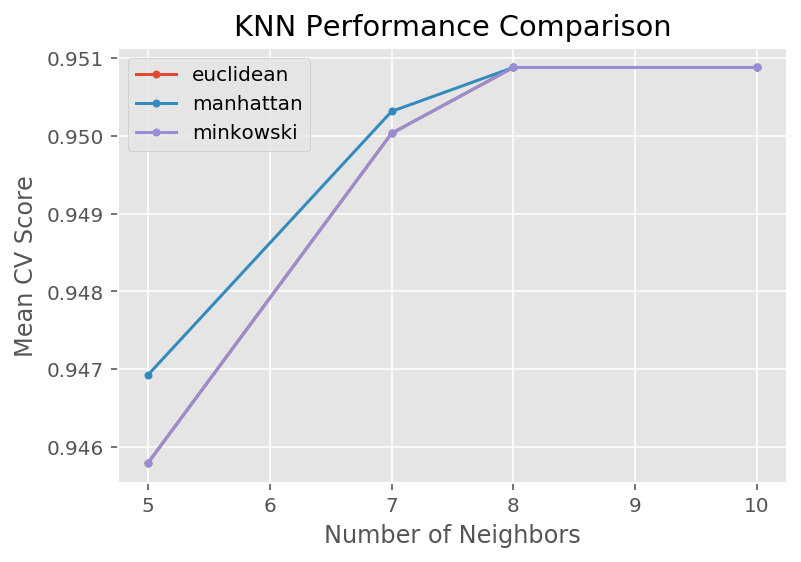

In [37]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

for i in result_KNN['metric'].unique():
    temp = result_KNN[result_KNN['metric'] == i]
    plt.plot(temp['n_neighbors'], temp['test_score'], marker = '.', label = i)

print("Values for Euclidean and Minkowski are same, so only one is being shown in the graph")    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean CV Score")
plt.title("KNN Performance Comparison")
plt.show()

### Decision Tree Hyperparameter Tuning <a name="DT"></a>

In [38]:
# Decision Tree
params_dec = {'criterion':['gini','entropy'],'random_state':[0], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}
grid_dec = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid = params_dec, scoring = 'accuracy',cv = 10)
grid_dec.fit(D_train_fs, target_train)
best_accuracy = grid_dec.best_score_
best_param = grid_dec.best_params_
print('{}:\nBest Accuracy : {:.2f}%'.format(DecisionTreeClassifier(),best_accuracy*100))
print('Best Parameters : ',best_param)
print('')
print('----------------')
print('')


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'):
Best Accuracy : 95.09%
Best Parameters :  {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2, 'random_state': 0}

----------------



In [39]:
result_dec = pd.DataFrame(grid_dec.cv_results_['params'])
result_dec['test_score'] = grid_dec.cv_results_['mean_test_score']

result_dec

,criterion,max_depth,min_samples_split,random_state,test_score
0,gini,1,2,0,0.950876
1,gini,1,3,0,0.950876
2,gini,2,2,0,0.950876
3,gini,2,3,0,0.950876
4,gini,3,2,0,0.950028
5,gini,3,3,0,0.950028
6,gini,4,2,0,0.947486
7,gini,4,3,0,0.947486
8,gini,5,2,0,0.946357
9,gini,5,3,0,0.946357


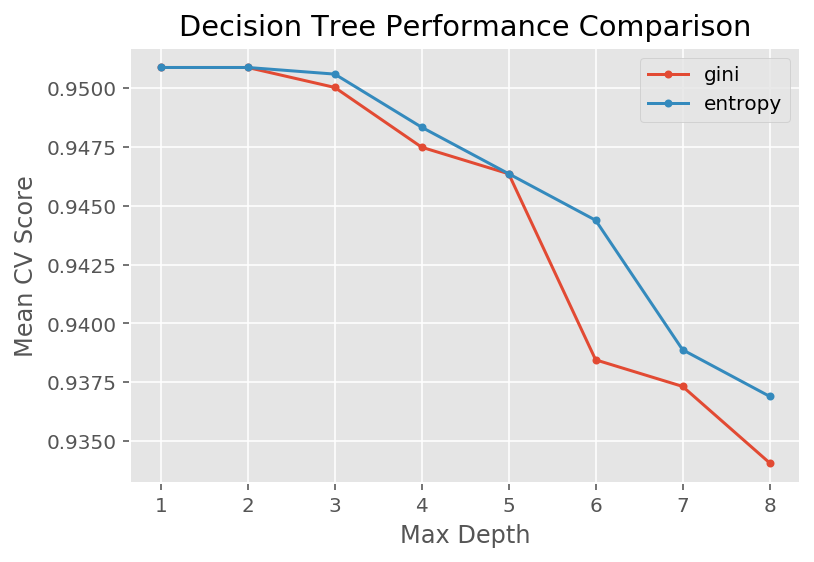

In [40]:
for i in ['gini', 'entropy']:
    temp = result_dec[result_dec['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("Decision Tree Performance Comparison")
plt.show()

### Gaussian Naive Bayes Hyperparameter Tuning <a name="GB"></a>

In [41]:
# Gaussian Naive Bayes
np.random.seed(999)
params_GB = {'var_smoothing': np.logspace(1,-3, num=200)}
grid_GB = GridSearchCV(estimator=GaussianNB(),param_grid = params_GB, scoring = 'roc_auc',cv = cv_method)
grid_GB.fit(D_train_fs, target_train)
best_accuracy = grid_GB.best_score_
best_param = grid_GB.best_params_
print('{}:\nBest Accuracy : {:.2f}%'.format(GaussianNB(),best_accuracy*100))
print('Best Parameters : ',best_param)
print('')
print('----------------')
print('')

GaussianNB(priors=None, var_smoothing=1e-09):
Best Accuracy : 81.02%
Best Parameters :  {'var_smoothing': 0.001}

----------------



In [42]:
results_GB = pd.DataFrame(grid_GB.cv_results_['params'])
results_GB['test_score'] = grid_GB.cv_results_['mean_test_score']

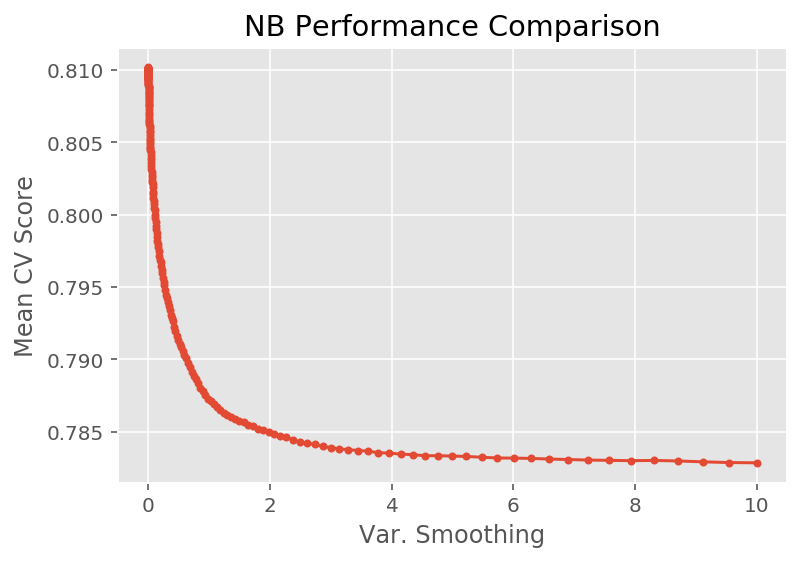

In [43]:
plt.plot(results_GB['var_smoothing'], results_GB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

### Support Vector Machines Hyperparameter Tuning <a name="SVM"></a>

In [44]:
# Support Vector Machines
params_SVM = {'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid_SVM = GridSearchCV(estimator=SVC(random_state=999),param_grid = params_SVM, scoring = 'roc_auc',cv = cv_method)
grid_SVM.fit(D_train_fs, target_train)
best_accuracy = grid_SVM.best_score_
best_param = grid_SVM.best_params_
print('{}:\nBest Accuracy : {:.2f}%'.format(SVC(),best_accuracy*100))
print('Best Parameters : ',best_param)
print('')
print('----------------')
print('')

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
Best Accuracy : 69.01%
Best Parameters :  {'C': 0.25, 'gamma': 0.001, 'kernel': 'rbf', 'random_state': 0}

----------------



### Random Forest Hyperparameter Tuning <a name="RF"></a>

In [45]:
# Random forest
params_RF = {'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0],'max_depth': [5, 7, 10, 12]}
grid_RF = GridSearchCV(estimator=RandomForestClassifier(random_state=999),param_grid = params_RF, scoring = 'roc_auc',cv = cv_method)
grid_RF.fit(D_train_fs, target_train)
best_accuracy = grid_RF.best_score_
best_param = grid_RF.best_params_
print('{}:\nBest Accuracy : {:.2f}%'.format(RandomForestClassifier(),best_accuracy*100))
print('Best Parameters : ',best_param)
print('')
print('----------------')
print('')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False):
Best Accuracy : 84.16%
Best Parameters :  {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 200, 'random_state': 0}

----------------



In [46]:
results_RF = pd.DataFrame(grid_RF.cv_results_['params'])
results_RF['test_score'] = grid_RF.cv_results_['mean_test_score']
results_RF.columns

Index(['criterion', 'max_depth', 'n_estimators', 'random_state', 'test_score'], dtype='object')

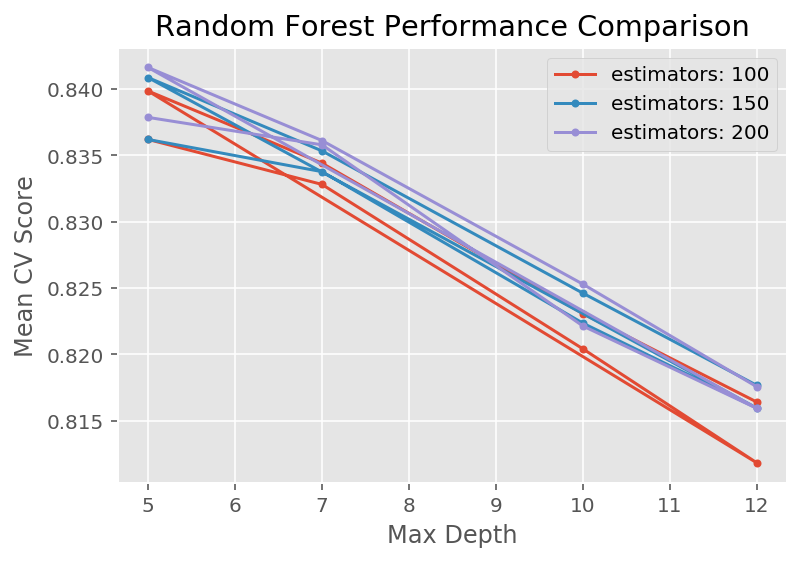

In [47]:
for i in results_RF['n_estimators'].unique():
    temp = results_RF[results_RF['n_estimators'] == i]
    plt.plot(temp['max_depth'], temp['test_score'], marker = '.', label = 'estimators: ' + str(i))
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("Random Forest Performance Comparison")
plt.show()

### Best Scores Summary <a name="BSsummary"></a>

In [48]:
# Best Scores Comparison
print('KNN:', grid_knn.best_score_.round(3))
print('Decision Tree:', grid_dec.best_score_.round(3))
print('Gaussian Naive Bayes:', grid_GB.best_score_.round(3))
print('Support Vector Machines:', grid_SVM.best_score_.round(3))
print('Random Forest:', grid_RF.best_score_.round(3))

KNN: 0.951
Decision Tree: 0.951
Gaussian Naive Bayes: 0.81
Support Vector Machines: 0.69
Random Forest: 0.842


## Model Comparison <a name="compare"></a>

### Area Under the Curve <a name="area"></a>

There were no significant differences between Gaussian Naive Bayes (0.79), Decision Tree (0.81) & Random Forest (0.83) models. Moreover, there was significant difference between K-Nearest Neighbors (0.68) and Support Vector Machine model (0.51). There was also substantial difference between the top 3 and bottom 2 models. This suggests that three models: Gaussian Naive Bayes (0.79), Decision Tree (0.81) & Random Forest (0.83) performed better compared to the K-Nearest Neigbors (0.68) and Support Vector Machine model (0.51). Additionally, we can infer from the results that the best performing model is Random Forest among all other models as it averages the Decision Tree predictions reducing the bias errors and limits overfitting.

In [49]:
# Model Comparison
cv_method_ttest = StratifiedKFold(n_splits=10, random_state=999)

cv_results_KNN = cross_val_score(estimator=grid_knn.best_estimator_,
                                 X=D_test_fs,
                                 y=target_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.6850379293240285

In [50]:
cv_results_DT = cross_val_score(estimator=grid_dec.best_estimator_,
                                X=D_test_fs,
                                y=target_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_DT.mean()

0.7067429529282979

In [51]:
from sklearn.preprocessing import PowerTransformer

D_test_transformed_fs = PowerTransformer().fit_transform(D_test_fs)

cv_results_GB = cross_val_score(estimator=grid_GB.best_estimator_,
                                X=D_test_transformed_fs,
                                y=target_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_GB.mean()

0.7683813970990695

In [52]:
cv_results_SVM = cross_val_score(estimator=grid_SVM.best_estimator_,
                                X=D_test_fs,
                                y=target_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_SVM.mean()

0.5093749144772852

In [53]:
cv_results_RF = cross_val_score(estimator=grid_RF.best_estimator_,
                                X=D_test_fs,
                                y=target_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_RF.mean()

0.8309090209359604

### Paired T-Test Comparison <a name="pairedttest"></a>

In [54]:
# Paired t-test
from scipy import stats

print(stats.ttest_rel(cv_results_KNN, cv_results_DT))
print(stats.ttest_rel(cv_results_KNN, cv_results_GB))
print(stats.ttest_rel(cv_results_DT, cv_results_GB))
print(stats.ttest_rel(cv_results_RF, cv_results_SVM))
print(stats.ttest_rel(cv_results_RF, cv_results_DT))
print(stats.ttest_rel(cv_results_RF, cv_results_KNN))
print(stats.ttest_rel(cv_results_RF, cv_results_GB))
print(stats.ttest_rel(cv_results_SVM, cv_results_DT))
print(stats.ttest_rel(cv_results_SVM, cv_results_KNN))
print(stats.ttest_rel(cv_results_SVM, cv_results_GB))

Ttest_relResult(statistic=-0.4407131627310027, pvalue=0.6698165495186141)
Ttest_relResult(statistic=-2.365848019449072, pvalue=0.04219508681670642)
Ttest_relResult(statistic=-1.4529238776403446, pvalue=0.1802034370059071)
Ttest_relResult(statistic=4.107286491732054, pvalue=0.0026477205524464606)
Ttest_relResult(statistic=6.118141499620948, pvalue=0.0001753458229762791)
Ttest_relResult(statistic=4.053917482966989, pvalue=0.002868008598164176)
Ttest_relResult(statistic=1.9291096584160048, pvalue=0.08579486768302913)
Ttest_relResult(statistic=-2.4093054442681314, pvalue=0.03929374850417946)
Ttest_relResult(statistic=-2.8698484696021085, pvalue=0.018481261926710693)
Ttest_relResult(statistic=-4.053747695138379, pvalue=0.002868739710719576)


### Classification Report: Accuracy, Precision, Recall, & F1 Score <a name="classification"></a>

In the Classification Report, it can be seen that the results are similar for all models except for Gaussian Naive Bays model. The support is identical in all models and the accuracy of Gaussian Naive Bayes model is a bit low in contrast with other models. The precision of all the models is a bit low compared to the Gaussian Naive Bayes model. The recall and f1-score of the Gaussian Bayes model have significant differences in comparison to the other models. Since the four models have same results, the best performer cannot be interpreted from the Classification Report and Confusion Matrix. 

In [55]:
# Classification report
pred_KNN = grid_knn.predict(D_test_fs)
D_test_fs_transformed = PowerTransformer().fit_transform(D_test_fs)
pred_NB = grid_GB.predict(D_test_fs_transformed)
pred_DT = grid_dec.predict(D_test_fs)
pred_SVM = grid_SVM.predict(D_test_fs)
pred_rf = grid_RF.predict(D_test_fs)

In [56]:
print("\nClassification Report for K-Nearest Neighbor") 
print(metrics.classification_report(target_test, pred_KNN))
print("\nClassification Report for Naive Bayes") 
print(metrics.classification_report(target_test, pred_NB))
print("\nClassification Report for Decision Tree") 
print(metrics.classification_report(target_test, pred_DT))
print("\nClassification Report for Support Vector Machines") 
print(metrics.classification_report(target_test, pred_SVM))
print("\nClassification Report for Random Forest") 
print(metrics.classification_report(target_test, pred_rf))


Classification Report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1444
           1       1.00      0.01      0.03        75

    accuracy                           0.95      1519
   macro avg       0.98      0.51      0.50      1519
weighted avg       0.95      0.95      0.93      1519


Classification Report for Naive Bayes
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1444
           1       0.13      0.39      0.20        75

    accuracy                           0.84      1519
   macro avg       0.55      0.63      0.56      1519
weighted avg       0.92      0.84      0.88      1519


Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1444
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1519
  

### Confusion Matrix <a name="confusion"></a>

In [57]:
# Confusion matrix
print("\nConfusion Matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(target_test, pred_KNN))
print("\nConfusion Matrix for Naive Bayes") 
print(metrics.confusion_matrix(target_test, pred_NB))
print("\nConfusion Matrix for Decision Tree") 
print(metrics.confusion_matrix(target_test, pred_DT))
print("\nConfusion Matrix for Support Vector Machines") 
print(metrics.confusion_matrix(target_test, pred_SVM))
print("\nConfusion Matrix for Random Forest") 
print(metrics.confusion_matrix(target_test, pred_rf))


Confusion Matrix for K-Nearest Neighbor
[[1444    0]
 [  74    1]]

Confusion Matrix for Naive Bayes
[[1253  191]
 [  46   29]]

Confusion Matrix for Decision Tree
[[1444    0]
 [  75    0]]

Confusion Matrix for Support Vector Machines
[[1444    0]
 [  75    0]]

Confusion Matrix for Random Forest
[[1444    0]
 [  75    0]]


# Critique & Limitations <a name="critique"></a>

### Strengths
One of the strengths for our approach is that we employed different feature selection approaches to find the best features. These features were consistent with the one's we found in the Phase 1 of this project. This proves that our analysis is on the right track. 
Moreover, with the right features in consideration we employed a range of different machine learning models which resulted in consistent results. We were able to find the best machine learning model for our particular dataset. The model found was consistent with the theoretical knowledge which provides further confidence in our approach.

### Limitations
One of the major limitations of our project is that our chosen dataset is highly undersampled which makes it difficult for the machine learning models to get higher predictive power. As we did not employ any method to oversample our dataset, the models selected may be biased. We could have used the oversampling technique such SMOTE but it is out of the scope of this course and it requires higher version of sci-kit which makes us unable to implement Gaussian Naive Bayes algorithm.

Our approach focused more on the predictability performance rather than interpretability. We can further do an in-depth analysis in choosing the perfect hyperparameters.

Also, we did not implement all the possible machine learning models like XGBoost which may yield in better results. So, there is a possibility that there may be some more suitable machine learning models out there.

# Summary & Conclusions <a name="conclusion"></a>

## Project Summary <a name="psummary"></a>

### Phase 1
Exploratory data analysis was performed on stroke dataset. Firstly, we performed data preparation and cleaning in which we checked the data types of each attributes. We performed the sanity checks and then, checked for missing values. We handled those missing values by using mean technique. After this our data was ready for exploration and visualisation. Then, we observed various relationship between the variables and got more insights from our dataset.
In this phase, we found out some major insights like - Old age people having hypertension or heart disease were seen to be suffering more by stroke than younger people, More number of females can be seen to have suffered by stroke as compared to males.

### Phase 2
In this Phase, we started off with preparing our dataset for modelling. First, we split our dataset into descriptive features that is data and our target feature as target. Then, we performed the one hot encoding of the categorical features and then, scaling of the numerical features.

We then started finding the best features for our target prediction. We implemented the Full Set selection, F-Score selection and Random Forest selection. Out of which F-Score selection yielded in best results. The selected 10 features were in contrast with the features of importance in Phase 1.

Now that we have done the feature selection, we proceeded with splitting our dataset into 70:30 train-test proportion for model fitting & tuning. We took the 10 best features we got from the f-score selection.

Further, Hyper-Parameter-tuning of Support Vector Machine, K_Nearest Neighbors, Gaussian Naive Bayes, Decision Tree and Naive Bayes models were carried out. Grid Search method and AUC curve as a scoring metric were applied for all the models. Since the dataset was severely unbalanced, the AUC curve was employed which performs best on biased datasets and in ranking predictions. The optimal parameters were chosen from the models that produced the best results after iterating with a set of parameters.

After all the analysis, we found out that Random Forest classifier outperformed all the other models. It outperformed decision tree as it averages the Decision Tree predictions reducing the bias errors and limits overfitting.
The AUC suggests Random Forest (0.8309) performed better than others. Now, we got substantial evidence that Random Forest outperforms all the others.
Then, we did the classification reports which gives a suitable evidence as well.
Atlast, we did the confusion matrix.



## Summary of Findings <a name="fsummary"></a>

We found that Random Forest classifier worked really well as compared to other models with 84.16%. Random forest classifier with 'entropy' criterion, 'max_depth' of 5, and 'n_estimators' equal to 200 with 10 best features selected by f-score selection produced highest cross-validated AUC score.
Moreover, when it was tested with the unseen data we can see that Decision tree, Support vector machine and Random forest yield almost the same results. We got this evidence from the classification reports.

## Conclusions <a name="conclusions"></a>

Based on the results, we can conclude that the Random Forest works best on classified dataset. We compared the different metrics used and found AUC Curve works better than the other metrics. We can derive that the AUC Curve not only just balances curve for the skewed class distribution but also in feature ranking.

# References <a name="references"></a>

[1] Aksakalli, D. (2021). Feature Selection and Ranking in Machine Learning. Retrieved 02 June 2021, from https://www.featureranking.com/

[2] Kaggle.com. 2021. Stroke Prediction Dataset. [online] Available at: <https://www.kaggle.com/fedesoriano/stroke-prediction-dataset> [Accessed 02 June 2021].
